# PLANT DISEASE CLASSIFICATION USING RESNET

In [10]:
!pip install torchsummary

ERROR: Could not find a version that satisfies the requirement torchsummary
ERROR: No matching distribution found for torchsummary


In [9]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

ModuleNotFoundError: No module named 'torchsummary'

# EDA

Loading the data 

In [13]:
data_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [20]:
data_dir_wheat = "../input/behzad-safari-jalal/data"
train_dir_wheat = data_dir_wheat + "/train"
valid_dir_wheat = data_dir_wheat + "/val"
diseases_wheat = os.listdir(train_dir_wheat)

In [5]:
# printing the disease names
print(diseases)

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

In [21]:
# printing the disease names
print(diseases_wheat)

['Yellow_rust', 'Brown_rust', 'Healthy']


In [1]:
import os
import shutil

# Function to copy files from source to destination
def copy_files(src, dst):
    if not os.path.exists(dst):
        os.makedirs(dst)
    for root, dirs, files in os.walk(src):
        for file in files:
            src_file = os.path.join(root, file)
            dst_file = os.path.join(dst, os.path.relpath(src_file, src))
            dst_dir = os.path.dirname(dst_file)
            if not os.path.exists(dst_dir):
                os.makedirs(dst_dir)
            shutil.copy2(src_file, dst_file)

# Define source directories
train_dir_wheat = "../input/behzad-safari-jalal/data/train"
valid_dir_wheat = "../input/behzad-safari-jalal/data/val"

train_dir_plants = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir_plants = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

# Define target directories in the working directory
target_train_dir = "./combined_dataset/train"
target_valid_dir = "./combined_dataset/valid"

# Copy files from both datasets into the new combined directory
copy_files(train_dir_plants, target_train_dir)
copy_files(valid_dir_plants, target_valid_dir)
copy_files(train_dir_wheat, target_train_dir)
copy_files(valid_dir_wheat, target_valid_dir)

print("Datasets combined successfully!")


Datasets combined successfully!


In [31]:
combined_dir = "./combined_dataset/train"
diseases_total= os.listdir(combined_dir)
print("Total disease classes are: {}".format(len(diseases_total)))

Total disease classes are: 41


In [35]:
import os

def rename_folders(base_dir, old_names, prefix):
    for old_name in old_names:
        old_path = os.path.join(base_dir, old_name)
        if os.path.exists(old_path):
            new_name = f"{prefix}_{old_name}"
            new_path = os.path.join(base_dir, new_name)
            os.rename(old_path, new_path)
            print(f"Renamed {old_path} to {new_path}")

# Define source directories for combined dataset
target_train_dir = "./combined_dataset/train"
target_valid_dir = "./combined_dataset/valid"

# List of wheat disease class names to be renamed
wheat_diseases = ['Brown_rust', 'Healthy', 'Yellow_rust']

# Prefix to be added
prefix = "Wheat"

# Rename folders in both training and validation directories
rename_folders(target_train_dir, wheat_diseases, prefix)
rename_folders(target_valid_dir, wheat_diseases, prefix)

print("Renaming completed.")


Renamed ./combined_dataset/train/Brown_rust to ./combined_dataset/train/Wheat_Brown_rust
Renamed ./combined_dataset/train/Healthy to ./combined_dataset/train/Wheat_Healthy
Renamed ./combined_dataset/train/Yellow_rust to ./combined_dataset/train/Wheat_Yellow_rust
Renamed ./combined_dataset/valid/Brown_rust to ./combined_dataset/valid/Wheat_Brown_rust
Renamed ./combined_dataset/valid/Healthy to ./combined_dataset/valid/Wheat_Healthy
Renamed ./combined_dataset/valid/Yellow_rust to ./combined_dataset/valid/Wheat_Yellow_rust
Renaming completed.


In [36]:
# Load combined dataset
train_dataset = ImageFolder(target_train_dir)
valid_dataset = ImageFolder(target_valid_dir)

# Extract class names
class_names = train_dataset.classes
print(f"Total number of unique diseases: {len(class_names)}")

# Function to extract plant names from class names
def extract_plant_names(class_names):
    plant_names = set()
    for name in class_names:
        plant = name.split("___")[0]  # Assuming the format is 'Plant___Disease'
        plant_names.add(plant)
    return plant_names

# Get unique plant names
unique_plants = extract_plant_names(class_names)
print(f"Total number of unique plants: {len(unique_plants)}")

# Display the unique plant names and unique diseases
print(f"Unique plants: {unique_plants}")
print(f"Unique diseases: {class_names}")

Total number of unique diseases: 41
Total number of unique plants: 17
Unique plants: {'Peach', 'Blueberry', 'Tomato', 'Potato', 'Pepper,_bell', 'Orange', 'Grape', 'Raspberry', 'Squash', 'Wheat_Brown_rust', 'Wheat_Yellow_rust', 'Cherry_(including_sour)', 'Apple', 'Corn_(maize)', 'Soybean', 'Strawberry', 'Wheat_Healthy'}
Unique diseases: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'P

The above cell extract the number of unique plants and number of unique diseases

So we have images of leaves of 14 plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.

In [42]:
import os
import pandas as pd

def count_images_in_folders(base_dir):
    disease_counts = {}
    for disease in os.listdir(base_dir):
        disease_dir = os.path.join(base_dir, disease)
        if os.path.isdir(disease_dir):
            num_images = len([file for file in os.listdir(disease_dir) if os.path.isfile(os.path.join(disease_dir, file))])
            disease_counts[disease] = num_images
    return disease_counts

# Define target directories for the combined dataset
target_train_dir = "./combined_dataset/train"
target_valid_dir = "./combined_dataset/valid"

# Count images in the training and validation directories
train_counts = count_images_in_folders(target_train_dir)
valid_counts = count_images_in_folders(target_valid_dir)

# Combine counts from training and validation directories
total_counts = {disease: train_counts.get(disease, 0) + valid_counts.get(disease, 0) for disease in set(train_counts) | set(valid_counts)}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(list(total_counts.items()), columns=['Disease', 'Number of Images'])
df.set_index('Disease', inplace=True)

# Print the DataFrame
print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv('disease_image_counts.csv')


                                                    Number of Images
Disease                                                             
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot              2052
Tomato___Tomato_Yellow_Leaf_Curl_Virus                          2451
Pepper,_bell___Bacterial_spot                                   2391
Corn_(maize)___healthy                                          2324
Blueberry___healthy                                             2270
Tomato___Septoria_leaf_spot                                     2181
Tomato___Spider_mites Two-spotted_spider_mite                   2176
Tomato___Bacterial_spot                                         2127
Strawberry___healthy                                            2280
Pepper,_bell___healthy                                          2485
Apple___Cedar_apple_rust                                        2200
Cherry_(including_sour)___Powdery_mildew                        2104
Tomato___Target_Spot              

#### Visualizing the above information on a graph

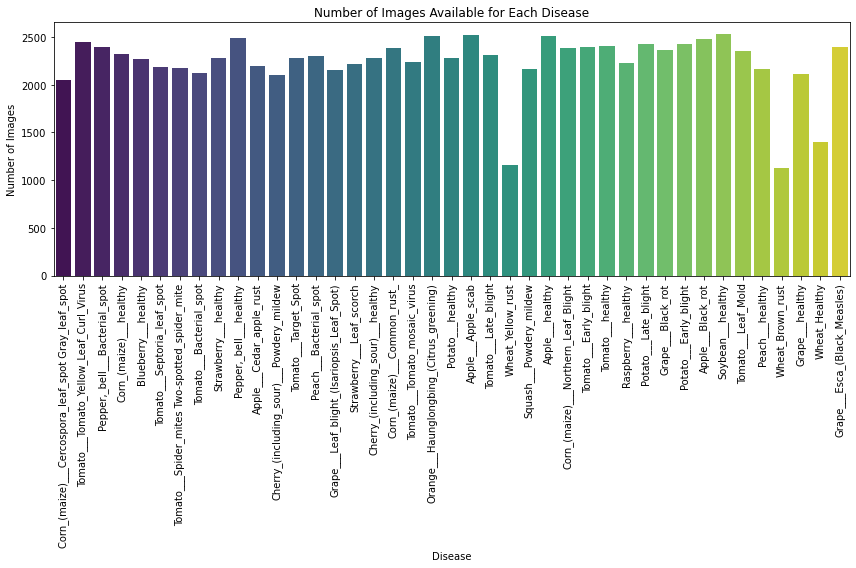

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the number of images for each disease
def plot_image_counts(df):
    plt.figure(figsize=(12, 8))
    
    # Using Seaborn for a better visual style
    sns.barplot(x=df.index, y=df['Number of Images'], palette='viridis')
    
    # Adding labels and title
    plt.xlabel('Disease')
    plt.ylabel('Number of Images')
    plt.title('Number of Images Available for Each Disease')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    
    # Show plot
    plt.tight_layout()
    plt.show()

# Assuming df is the DataFrame created earlier
plot_image_counts(df)


We can see that the dataset is almost balanced for all classes, so we are good to go forward

#### Images available for training

In [45]:
import os

def count_images_in_dataset(base_dir):
    total_images = 0
    for label in os.listdir(base_dir):
        label_dir = os.path.join(base_dir, label)
        if os.path.isdir(label_dir):
            num_images = len([file for file in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, file))])
            total_images += num_images
    return total_images

# Define the directory for training images
train_dir = "./combined_dataset/train"

# Get the total number of images in the training dataset
total_train_images = count_images_in_dataset(train_dir)
print(f"Total images available for training: {total_train_images}")


Total images available for training: 73237


# 🍳 Data Preparation for training 🍳

In [60]:
from PIL import Image, ImageOps
import os

def make_image_square(image_path, output_path, target_size=256):
    with Image.open(image_path) as img:
        # Calculate the size of the new image
        old_size = img.size
        ratio = float(target_size) / max(old_size)
        new_size = tuple([int(x * ratio) for x in old_size])

        # Resize the image with the new size
        img = img.resize(new_size, Image.ANTIALIAS)

        # Create a new image with a white background
        new_img = Image.new("RGB", (target_size, target_size), (255, 255, 255))
        new_img.paste(img, ((target_size - new_size[0]) // 2,
                            (target_size - new_size[1]) // 2))

        # Save the square image
        new_img.save(output_path)

def process_images(input_dir, output_dir, target_size=256):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for folder_name in os.listdir(input_dir):
        folder_path = os.path.join(input_dir, folder_name)
        output_folder_path = os.path.join(output_dir, folder_name)
        
        if not os.path.exists(output_folder_path):
            os.makedirs(output_folder_path)
        
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            output_path = os.path.join(output_folder_path, image_name)
            
            make_image_square(image_path, output_path, target_size)

# Define directories
input_train_dir = "./combined_dataset/train"
output_train_dir = "./combined_dataset/train_squared"

# Process the images to make them square
process_images(input_train_dir, output_train_dir, target_size=256)


In [1]:
# datasets for validation and training
train = ImageFolder("./combined_dataset/train_squared", transform=transforms.ToTensor())
valid = ImageFolder("./combined_dataset/valid", transform=transforms.ToTensor()) 

NameError: name 'ImageFolder' is not defined

`torchvision.datasets` is a class which helps in loading all common and famous datasets. It also helps in loading custom datasets. I have used subclass `torchvision.datasets.ImageFolder` which helps in loading the image data when the data is arranged in this way:

----------------
root/dog/xxx.png

root/dog/xxy.png

root/dog/xxz.png

<br>

root/cat/123.png

root/cat/nsdf3.png

root/cat/asd932_.png

----------------

Next, after loading the data, we need to transform the pixel values of each image (0-255) to 0-1 as neural networks works quite good with normalized data. The entire array of pixel values is converted to torch [tensor](https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html#:~:text=A%20PyTorch%20Tensor%20is%20basically,used%20for%20arbitrary%20numeric%20computation.) and then divided by 255.
If you are not familiar why normalizing inputs help neural network, read [this](https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d) post.

#### Image shape 

In [63]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


We can see the shape (3, 256 256) of the image. 3 is the number of channels (RGB) and 256 x 256 is the width and height of the image

In [64]:
# total number of classes in train set
len(train.classes)

41

In [65]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

## 🖼️ Some Images from training dataset 🖼️

Label :Apple___Apple_scab(0)


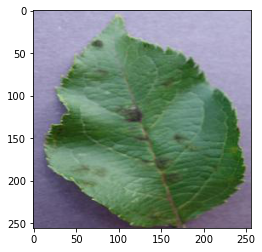

In [66]:
show_image(*train[0])

Label :Tomato___healthy(37)


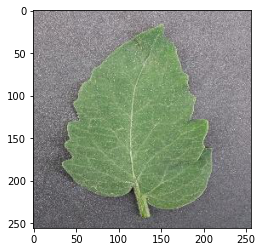

In [67]:
show_image(*train[70000])

Label :Wheat_Healthy(39)


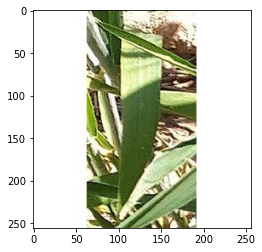

In [68]:
show_image(*train[72000])

In [69]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)

In [70]:
# setting the batch size
batch_size = 32

`batch_size` is the total number of images given as input at once in forward propagation of the CNN. Basically, batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network.

In [71]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

- `DataLoader` is a subclass which comes from `torch.utils.data`. It helps in loading large and memory consuming datasets. It takes in `batch_size` which denotes the number of samples contained in each generated batch. 

- Setting `shuffle=True` shuffles the dataset. It is heplful so that batches between epochs do not look alike. Doing so will eventually make our model more robust.

- `num_workers`, denotes the number of processes that generate batches in parallel. If you have more cores in your CPU, you can set it to number of cores in your CPU. Since, Kaggle provides a 2 core CPU, I have set it to 2


In [72]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

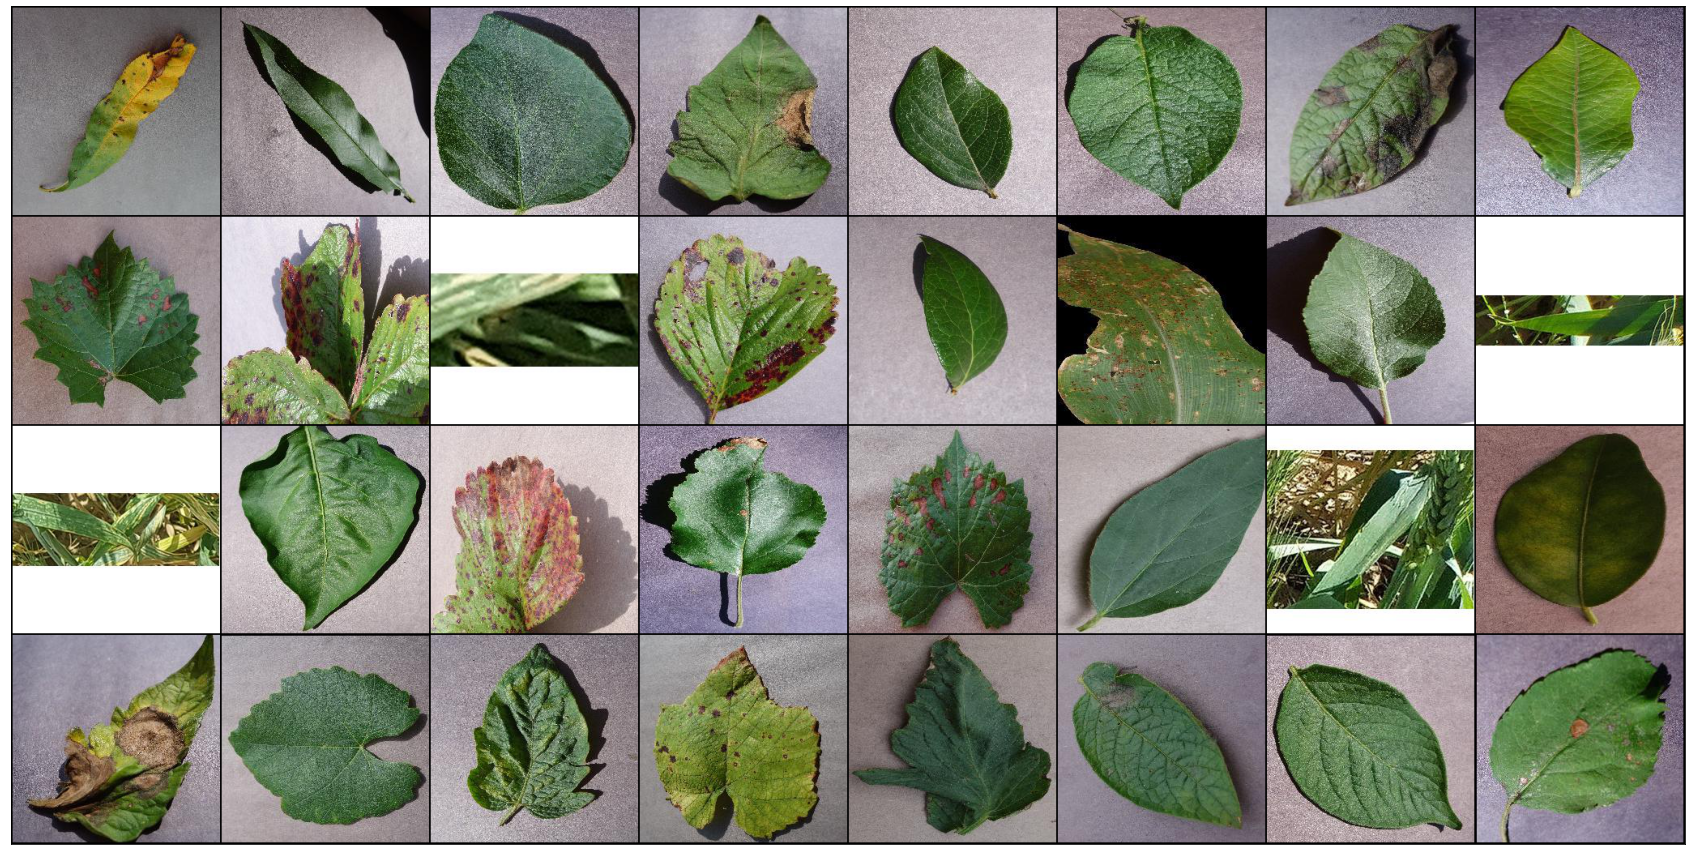

In [73]:
# Images for first batch of training
show_batch(train_dl) 

# 🏗️ Modelling 🏗️

In [109]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.models import resnet18
from torchvision.models.resnet import ResNet, BasicBlock
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Check for device availability
def get_default_device():
    return torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device = get_default_device()
device

device(type='cpu')

In [110]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        self.classes = sorted([d.name for d in os.scandir(root_dir) if d.is_dir()])
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self._load_images()

    def _load_images(self):
        for cls in self.classes:
            cls_dir = os.path.join(self.root_dir, cls)
            for img_name in os.listdir(cls_dir):
                self.images.append(os.path.join(cls_dir, img_name))
                self.labels.append(self.class_to_idx[cls])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [111]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the required input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Pretrained mean/std
])

# Paths to your dataset directories
train_dir = './combined_dataset/train_squared'
valid_dir = './combined_dataset/valid'

# Create dataset and dataloaders
train_dataset = CustomImageDataset(root_dir=train_dir, transform=transform)
valid_dataset = CustomImageDataset(root_dir=valid_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers=4)


In [115]:
class SimpleResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super(SimpleResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x

class ResNet9(nn.Module):
    def __init__(self, num_classes):
        super(ResNet9, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.res_block1 = nn.Sequential(SimpleResidualBlock(64), SimpleResidualBlock(64))
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True)
        )
        self.res_block2 = nn.Sequential(SimpleResidualBlock(128), SimpleResidualBlock(128))
        self.pool2 = nn.MaxPool2d(2)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 56 * 56, num_classes)  # Assuming input size is 224x224
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.res_block1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.res_block2(x)
        x = self.pool2(x)
        x = self.classifier(x)
        return x

    def training_step(self, batch):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)
        outputs = self(images)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)
        outputs = self(images)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        acc = accuracy(outputs, labels)
        return {'val_loss': loss, 'val_accuracy': acc}

    def validation_epoch_end(self, outputs):
        val_losses = [x['val_loss'] for x in outputs]
        val_accuracies = [x['val_accuracy'] for x in outputs]
        return {'val_loss': torch.stack(val_losses).mean(), 'val_accuracy': torch.stack(val_accuracies).mean()}

    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch + 1}], Train Loss: {result['train_loss']:.4f}, "
              f"Val Loss: {result['val_loss']:.4f}, Val Accuracy: {result['val_accuracy']:.4f}")


In [116]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0, grad_clip=None, opt_func=optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    sched = optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation
        model.eval()
        with torch.no_grad():
            result = evaluate(model, val_loader)
            result['train_loss'] = torch.stack(train_losses).mean().item()
            result['lrs'] = lrs
            model.epoch_end(epoch, result)
            history.append(result)

    return history



In [ ]:
# Define model, optimizer and other parameters
num_classes = len(train_dataset.classes)
model = ResNet9(num_classes).to(device)
epochs = 10
max_lr = 1e-3
weight_decay = 1e-4
grad_clip = 1.0

# Train the model
history = fit_one_cycle(epochs, max_lr, model, train_loader, valid_loader, weight_decay, grad_clip)

# Plot the training history
plot_history(history)


## testing

In [ ]:
test_dir = "../input/new-plant-diseases-dataset/test"
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [ ]:
test_images = sorted(os.listdir(test_dir + '/test')) # since images in test folder are in alphabetical order
test_images

In [ ]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

In [ ]:
# predicting first image
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [ ]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

**We can see that the model predicted all the test images perfectly!!!!**

# Saving the model

**There are several ways to save the model in Pytorch, following are the two most common ways**

1. **Save/Load `state_dict` (Recommended)**

When saving a model for inference, it is only necessary to save the trained model’s learned parameters. Saving the model’s `state_dict` with the `torch.save()` function will give you the most flexibility for restoring the model later, which is why it is the recommended method for saving models.

A common PyTorch convention is to save models using either a `.pt` or `.pth` file extension.

Remember that you must call `model.eval()` to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

In [ ]:
# saving to the kaggle working directory
PATH = './plant-disease-model.pth'  
torch.save(model.state_dict(), PATH)

2. **Save/Load Entire Model**

This save/load process uses the most intuitive syntax and involves the least amount of code. Saving a model in this way will save the entire module using Python’s [pickle](https://docs.python.org/3/library/pickle.html) module. The disadvantage of this approach is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved. The reason for this is because pickle does not save the model class itself. Rather, it saves a path to the file containing the class, which is used during load time. Because of this, your code can break in various ways when used in other projects or after refactors.

In [ ]:
# saving the entire model to working directory
PATH = './plant-disease-model-complete.pth'
torch.save(model, PATH)